In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Load our dataset
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y_train = np.array([300, 410, 490, 630, 720, 799, 905, 995, 1120, 1200, 1330, 1400, 1490, 1620, 1690])

# Function to calculate cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = (1 / (2 * m)) * cost
    return total_cost

In [5]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [16]:
def gradient_descent(x, y, w_in, b_in, a, iters, cost_f, gradient_f):
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(iters):
        dj_dw, dj_db = gradient_f(x, y, w, b)
        b = b - a * dj_db
        w = w - a * dj_dw
        
        if i < 1000:
            J_history.append(cost_f(x, y, w, b))
            p_history.append([w, b])
            
        if (i % 500) == 0:
            print(f'iteration: {i},\tcost: {J_history[-1]: 0.2e},\tdj_dw: {dj_dw: 0.2e},\tdj_db: {dj_db: 0.2e},\tw: {w: 0.2e},\tb: {b: 0.2e}')
            
    return w, b, J_history, p_history

In [24]:
w_init = 0
b_init = 0

iters = 10000
a = 0.0001

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, a, iters, compute_cost, compute_gradient)
print(f'Nilai akhir w = {w_final}, b = {b_final}')

iteration: 0,	cost:  5.90e+05,	dj_dw: -9.91e+03,	dj_db: -1.01e+03,	w:  9.91e-01,	b:  1.01e-01
iteration: 500,	cost:  4.53e+03,	dj_dw: -1.46e+02,	dj_db: -5.83e+01,	w:  1.17e+02,	b:  1.36e+01
iteration: 1000,	cost:  4.30e+03,	dj_dw:  1.91e+00,	dj_db: -4.34e+01,	w:  1.18e+02,	b:  1.59e+01
iteration: 1500,	cost:  4.30e+03,	dj_dw:  4.11e+00,	dj_db: -4.27e+01,	w:  1.18e+02,	b:  1.81e+01
iteration: 2000,	cost:  4.30e+03,	dj_dw:  4.10e+00,	dj_db: -4.22e+01,	w:  1.18e+02,	b:  2.02e+01
iteration: 2500,	cost:  4.30e+03,	dj_dw:  4.05e+00,	dj_db: -4.18e+01,	w:  1.18e+02,	b:  2.23e+01
iteration: 3000,	cost:  4.30e+03,	dj_dw:  4.01e+00,	dj_db: -4.13e+01,	w:  1.18e+02,	b:  2.44e+01
iteration: 3500,	cost:  4.30e+03,	dj_dw:  3.96e+00,	dj_db: -4.08e+01,	w:  1.17e+02,	b:  2.64e+01
iteration: 4000,	cost:  4.30e+03,	dj_dw:  3.92e+00,	dj_db: -4.04e+01,	w:  1.17e+02,	b:  2.84e+01
iteration: 4500,	cost:  4.30e+03,	dj_dw:  3.88e+00,	dj_db: -3.99e+01,	w:  1.17e+02,	b:  3.04e+01
iteration: 5000,	cost:  4.30e+03,	

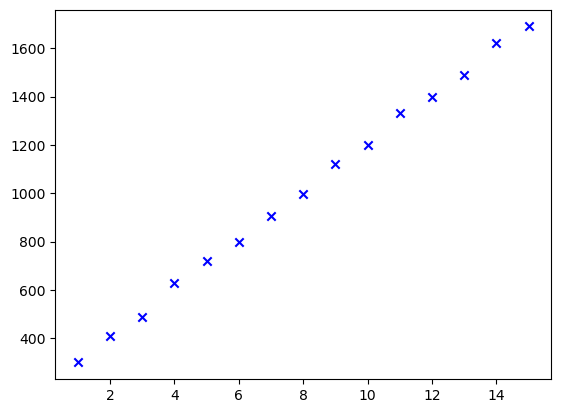

In [25]:
plt.scatter(x_train, y_train, marker='x', c='b')
plt.show()

In [26]:
def F(x_train, w_final, b_final):
    y_prediksi = []
    for x in x_train:
        hasil = w_final * x + b_final
        y_prediksi.append(hasil)
    return y_prediksi

y_prediksi = F(x_train, w_final, b_final)
print(y_prediksi)

[166.1325313984801, 281.15440470715475, 396.1762780158294, 511.198151324504, 626.2200246331787, 741.2418979418534, 856.263771250528, 971.2856445592026, 1086.307517867877, 1201.3293911765518, 1316.3512644852265, 1431.3731377939012, 1546.3950111025758, 1661.4168844112503, 1776.438757719925]


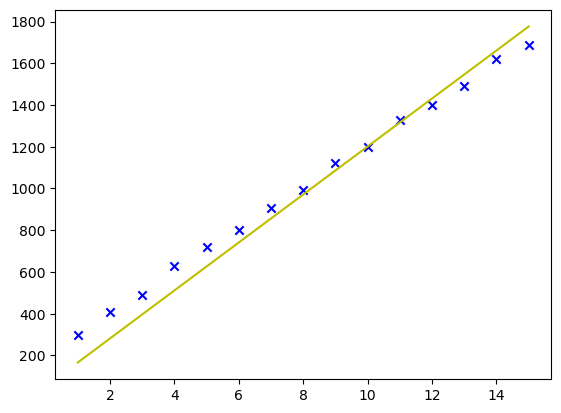

In [27]:
plt.scatter(x_train, y_train, marker='x', c='b')
plt.plot(x_train, y_prediksi, c='y')
plt.show()